# CCS Prediction
This notebook focuses on analyzing the CCS prediction using different methods, performance comparison will be shown

## Preliminars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import utils
import scipy


Bad key "text.kerning_factor" on line 4 in
/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df1 = pd.read_csv('../dl_paper/SourceData_Figure_1.csv')
df4 = pd.read_csv('../dl_paper/SourceData_Figure_4.csv')

# Linear Regression

In [4]:
import regression_linear

In [5]:
lr = regression_linear.LinearRegression()
lr.fit(df1)

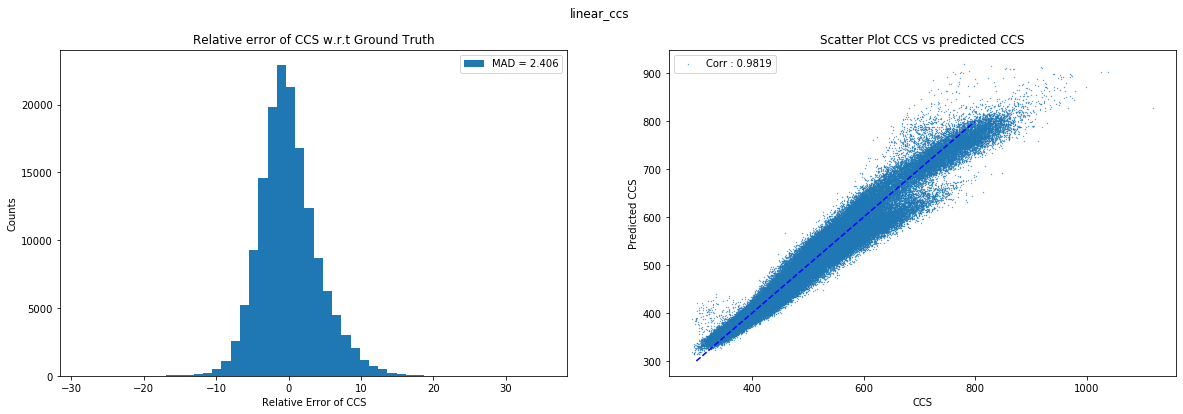

In [6]:
df4['m/z'] = df4.apply(lambda x: utils.calculate_mass(x['Modified_sequence'], x['Charge']), axis = 1)
lr.test_set_plot(df4)

# Power-law Regression

In [23]:
import regression_power

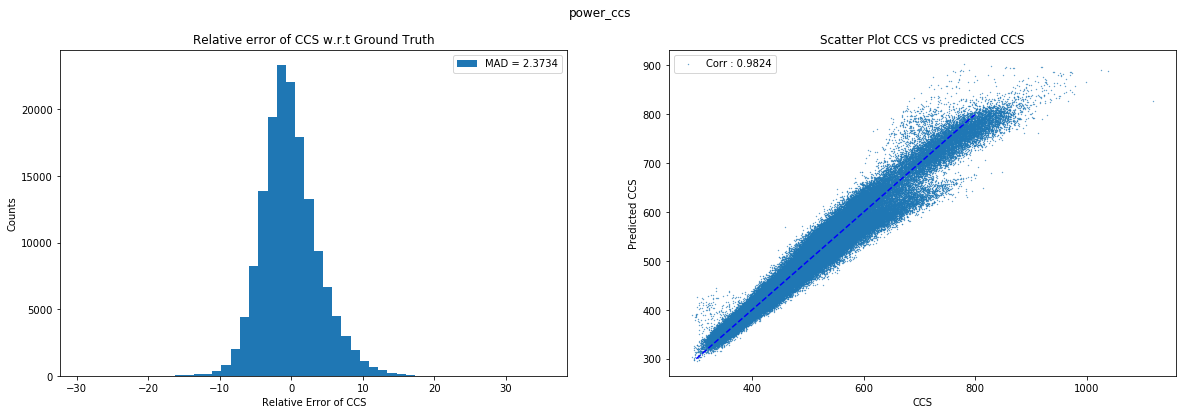

In [25]:
pl = regression_power.PowerLawRegression()
pl.fit(df1)
pl.test_set_plot(df4)


# XGBoost

In [ ]:
import regression_xgboost

In [ ]:
path_models = "/mnt/pool-cox-data08/Juan/ccs/models/"

## XGBoost Counts

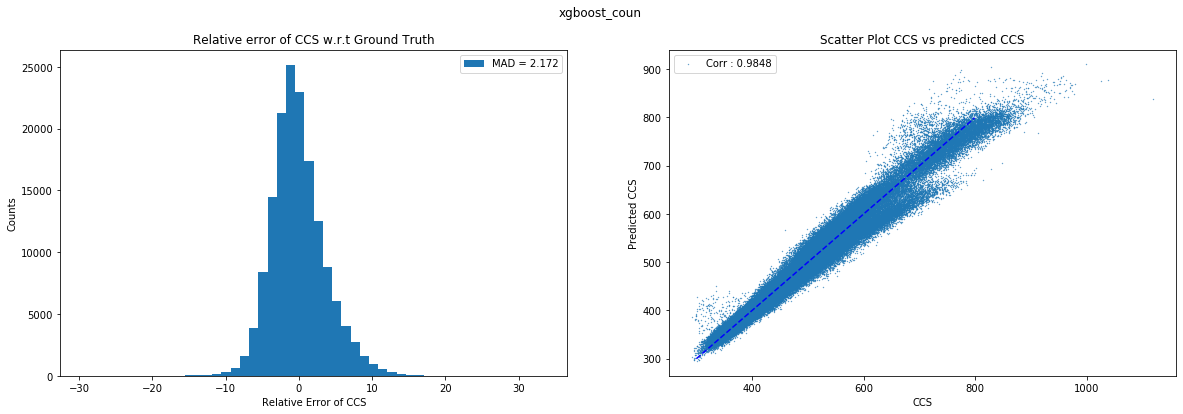

In [ ]:
regression_xgboost.test_set_results('Counts')

## XGBoost Di-peptides

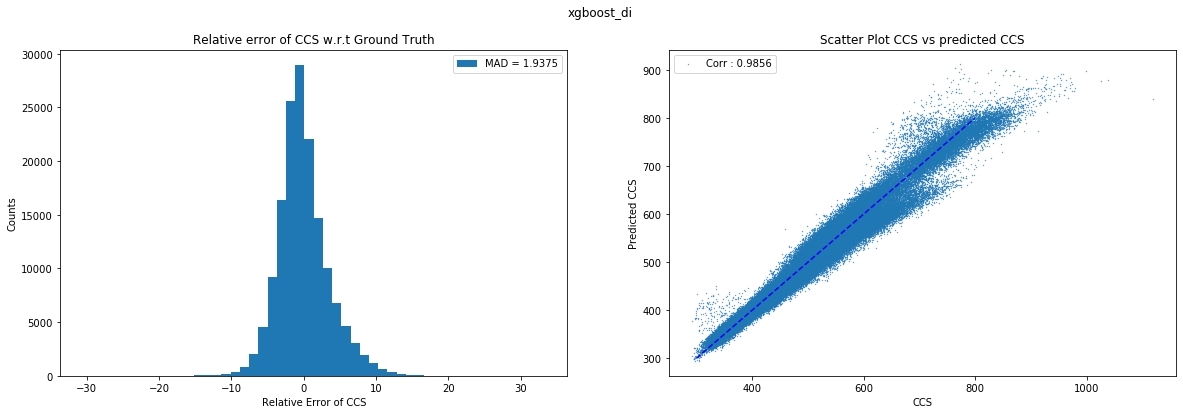

In [ ]:
regression_xgboost.test_set_results('Di-peptides')

## XGBoost Counts + Di-peptides

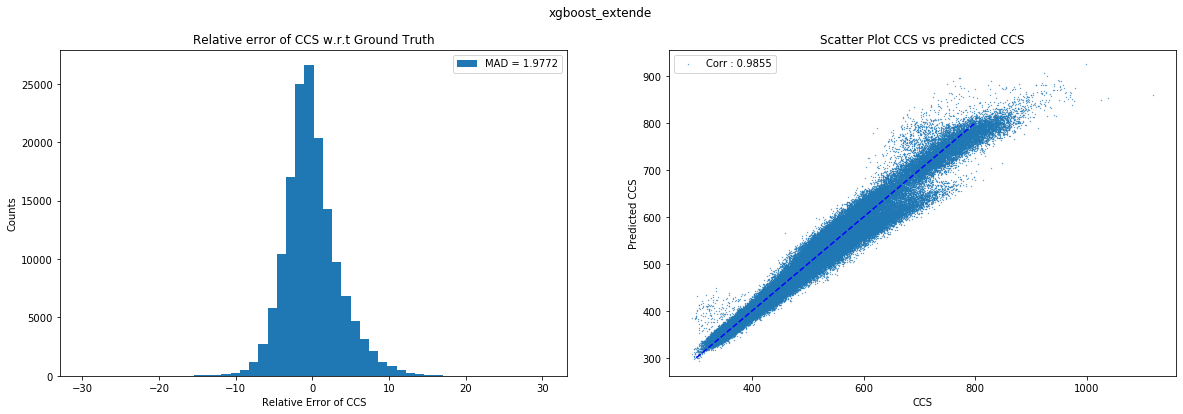

In [ ]:
regression_xgboost.test_set_results('Extended')

## XGBoost di-peptides + helix

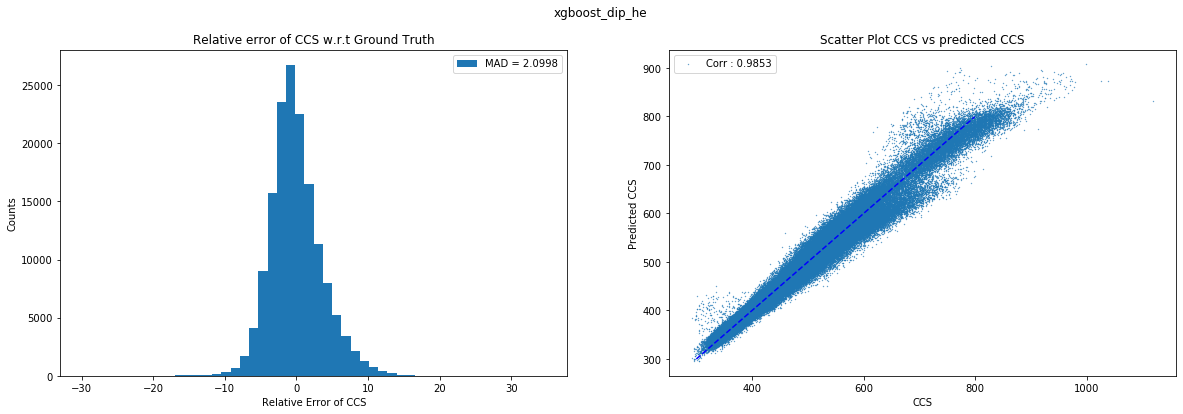

In [ ]:
regression_xgboost.test_set_results('Dip-hel')

# LinearSVR

In [26]:
import svr

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


## SVR Counts

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.8s remaining:    3.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


Creating histogram
Creating scatter plot


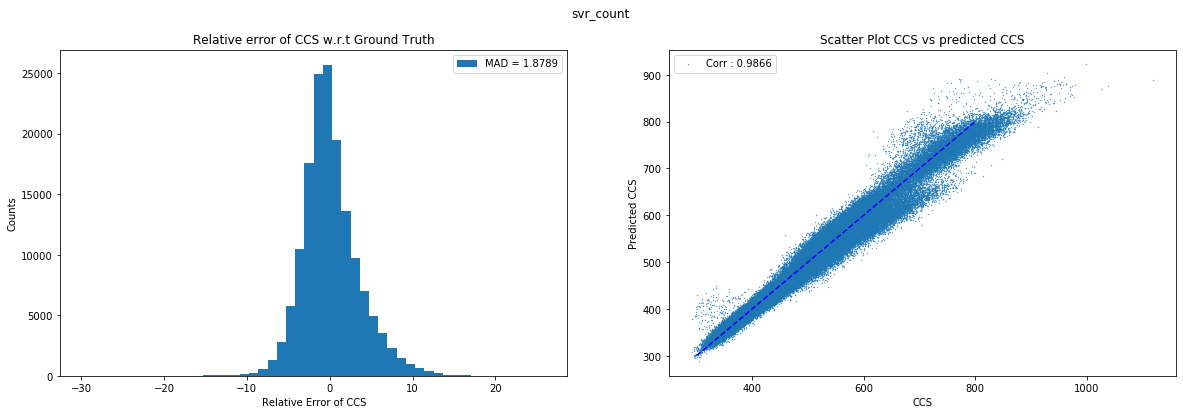

In [27]:
svr_counts = svr.test_set_results('Counts')

Text(0.5, 1.0, 'SVR count CCS vs m/z')

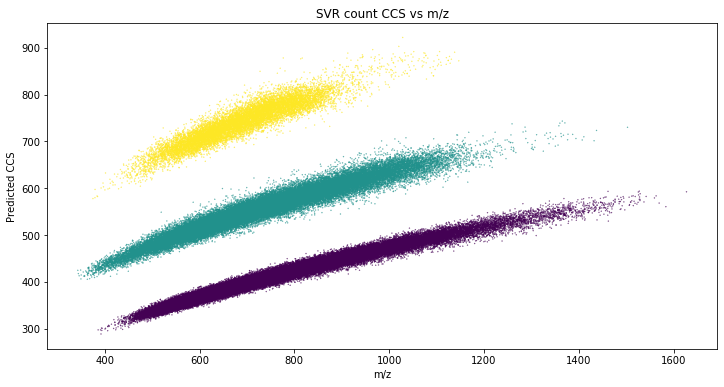

In [30]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.scatter(df4['m/z'], svr_counts, c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR count CCS vs m/z')

## SVR Di-peptides

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    2.8s remaining:   11.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.0s remaining:    4.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.3s finished


Creating histogram
Creating scatter plot


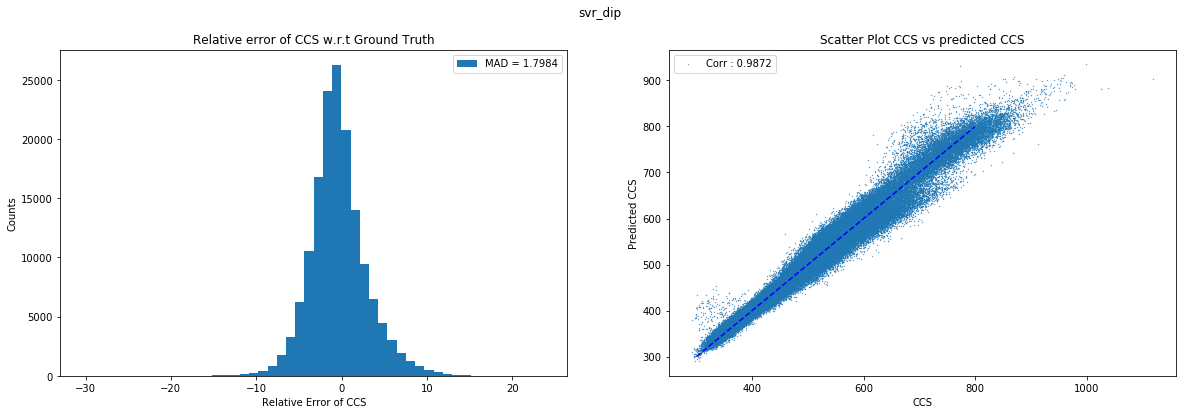

In [31]:
svr_dip = svr.test_set_results('Di-peptides')

Text(0.5, 1.0, 'SVR dip CCS vs m/z')

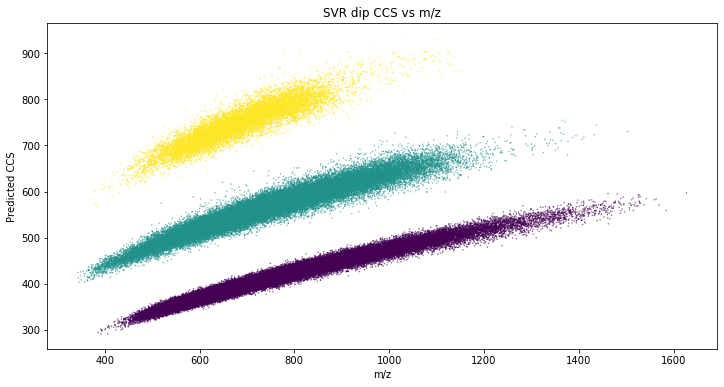

In [32]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.scatter(df4['m/z'], svr_dip, c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR dip CCS vs m/z')

## SVR Counts + Di-peptides

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    3.6s remaining:   14.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.3s remaining:    5.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.3s finished


Creating histogram
Creating scatter plot


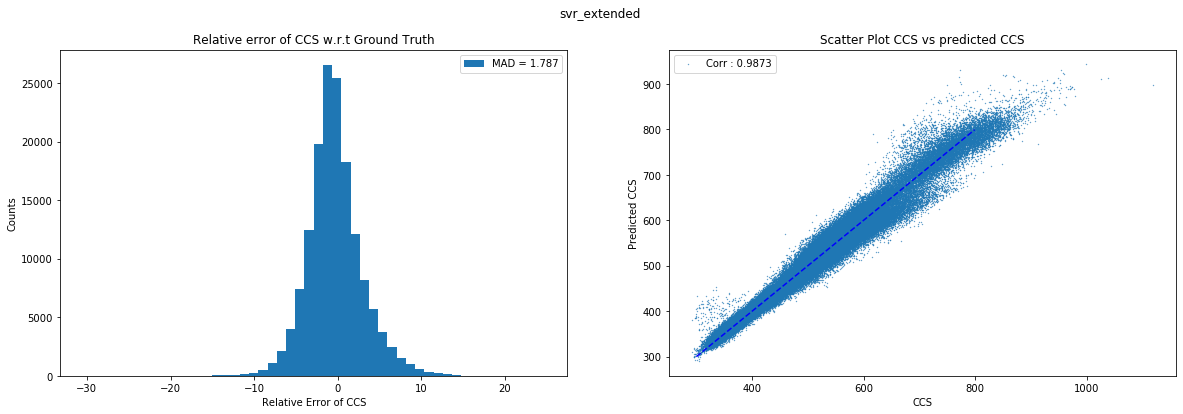

In [33]:
svr_ext = svr.test_set_results('Extended')

Text(0.5, 1.0, 'SVR extended CCS vs m/z')

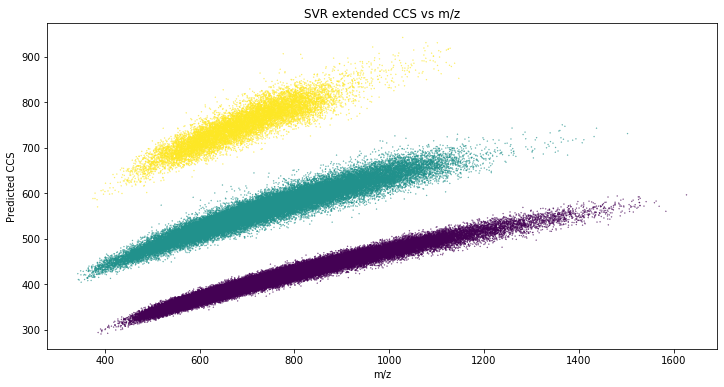

In [34]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.scatter(df4['m/z'], svr_ext, c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR extended CCS vs m/z')

## SVR Dipeptides and Helix

Predicting


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    6.2s remaining:   24.6s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    2.1s remaining:    8.4s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.5s remaining:    2.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished


Creating histogram
Creating scatter plot


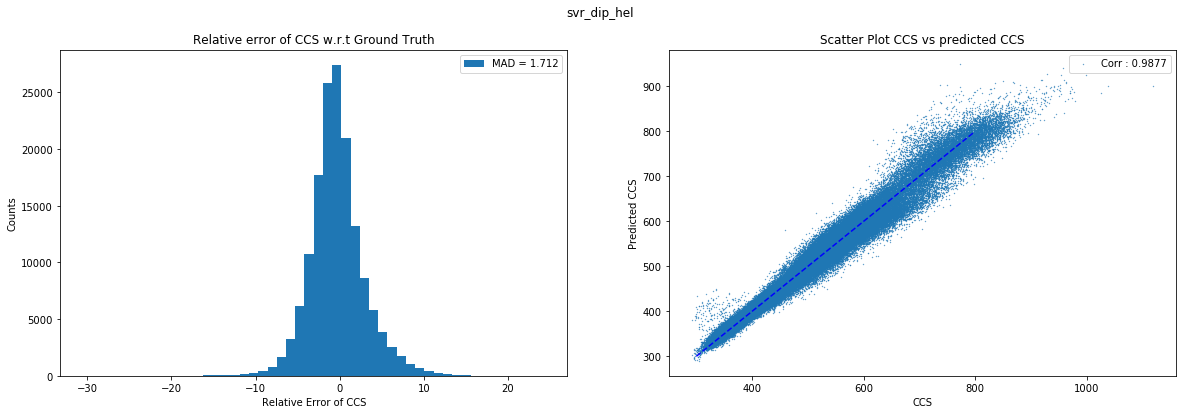

In [35]:
svr_dip_hel = svr.test_set_results('Dip-hel')

Text(0.5, 1.0, 'SVR dip+hel CCS vs m/z')

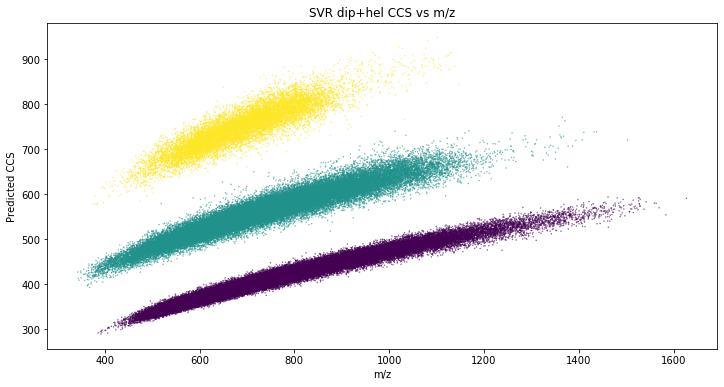

In [36]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
ax.scatter(df4['m/z'], svr_dip_hel, c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('SVR dip+hel CCS vs m/z')

# RNN

Creating scatter plot


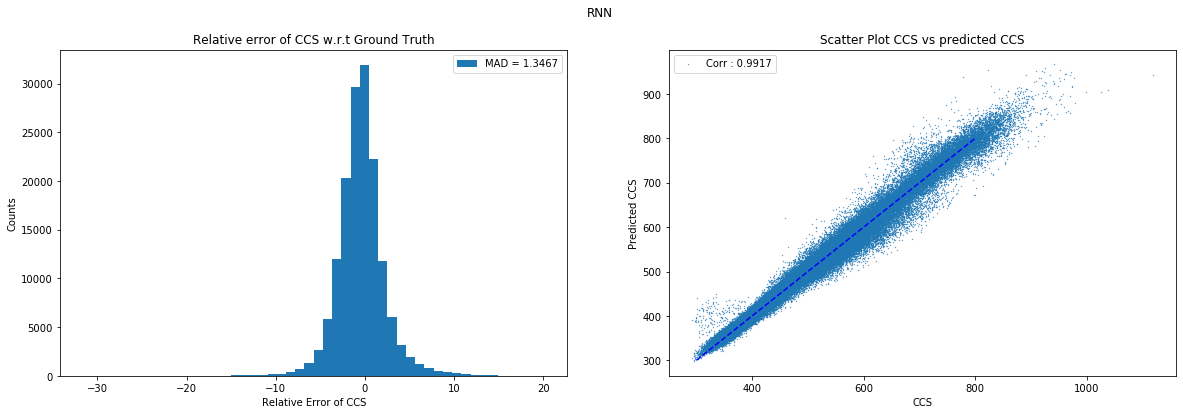

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
fig.suptitle('RNN', fontsize = 12)
res_rel = (df4['CCS']-df4['label Prediction 0'])/df4['label Prediction 0']*100
ax[0].hist(res_rel, bins = 50, label = f'MAD = {np.round(scipy.stats.median_abs_deviation(res_rel), 4)}')
ax[0].set_xlabel('Relative Error of CCS')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error of CCS w.r.t Ground Truth')
ax[0].legend()

print('Creating scatter plot')
corr, _ = scipy.stats.pearsonr(df4['label Prediction 0'],df4['CCS'])
ax[1].scatter(df4['CCS'], df4['label Prediction 0'], label = f'Corr : {np.round(corr, 4)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS vs predicted CCS')
ax[1].plot(np.arange(300,800), np.arange(300,800), 'b--')
ax[1].legend()

Text(0.5, 1.0, 'RNN CCS vs m/z')

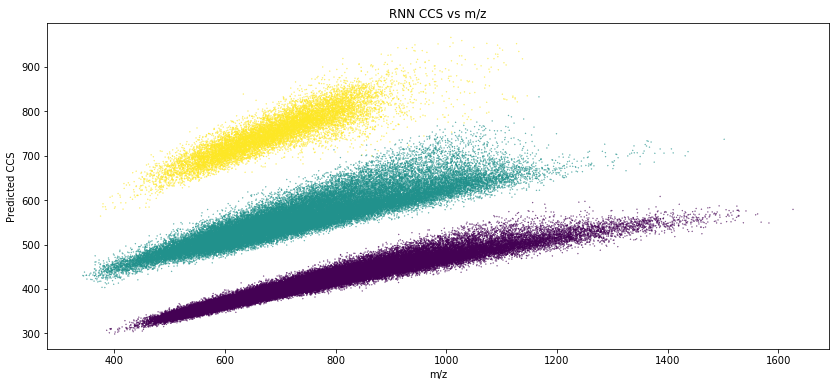

In [21]:
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(14,6)
ax.scatter(x=df4['m/z'], y=df4['label Prediction 0'], c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('RNN CCS vs m/z')

**Important:** any of the models predicts the second population

Text(0.5, 1.0, 'RNN CCS vs m/z')

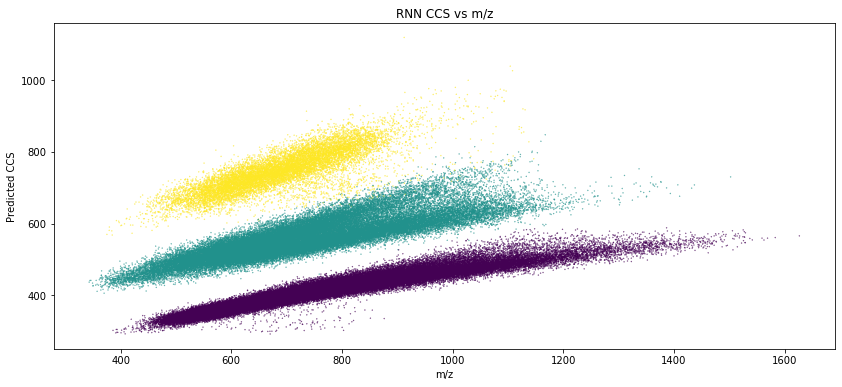

In [38]:
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(14,6)
ax.scatter(x=df4['m/z'], y=df4['CCS'], c = df4['Charge'], s = 0.1)
ax.set_xlabel('m/z')
ax.set_ylabel('Predicted CCS')
ax.set_title('RNN CCS vs m/z')